## 예제
1. csv폴더 안 test_csv 폴더에서 '오프라인.csv' 파일을 로드
2. 컬럼의 이름을 변경 -> ['기준년월', '업종', '성별', '연령대', '총이용건수',
'총이용금액']
3. 결측치가 존재하는가? 확인
4. 기준년월 데이터를 시계열 데이터로 변경
5. 성별을 기준으로 연도별 건당 이용금액의 평균이 어떻게 되는가?
    - 기준년 데이터가 존재하지 않기 때문에 기준년 컬럼을 생성 -> 기준년월 데이터에서 추출
    - 건당이용금액 데이터는 총이용금액 / 총이용건수를 계산하여 대입
    - 기준년 데이터를 이용하여 데이터를 그룹화 / 재구조화를 하고 건당이용금액의 평균을 구한다.

In [64]:
import pandas as pd

In [65]:
# 데이터 로드
offline = pd.read_csv("../../csv/test_csv/오프라인.csv", encoding='cp949')

In [66]:
offline.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [67]:
# 컬럼의 이름을 변경
# case1 rename()함수
offline.rename(
    columns={
        'crym' : '기준년월'
    }
)

,기준년월,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6.283353e+09
2644,202109,편의점,2,60,243768,1.997442e+09
2645,202109,편의점,2,70,40523,3.524203e+08
2646,202109,편의점,2,80,6349,5.333488e+07


In [68]:
# Dateframe 안에 columns 변수의 데이터를 변경
offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [69]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [70]:
# 결측치를 확인하는 방법
# 데이터프레임의 정보 출력
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2648 non-null   int64  
 1   업종      2648 non-null   object 
 2   성별      2648 non-null   int64  
 3   연령대     2648 non-null   int64  
 4   총이용건수   2648 non-null   int64  
 5   총이용금액   2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.2+ KB


In [71]:
# isna() : 결측치의 유무를 판단하는 함수
# sum() : 합계를 구하는 함수 (True는 1, False는 0)
offline.isna().sum()

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [72]:
# 성별 컬럼의 데이터중 '-'는 결측치라고 항목 정의서에 명시
# '-' 데이터의 개수를 확인
# 1 : 남자, 2 : 여자, 9: 남녀무관, - : 결측치
# isin() 함수 이용
offline['성별'].isin(['-']).sum()

np.int64(0)

In [73]:
offline['성별'].value_counts()

성별
2    1336
1    1312
Name: count, dtype: int64

In [74]:
from datetime import datetime

In [75]:
# 기준년월 데이터를 시계열 데이터로 변경
# datetime 라이브러리 사용
offline['기준년월']
datetime.strptime( str(offline['기준년월'][0]), '%Y%m')
# python에서 제공하는 기본 map( 함수, 1차원 데이터 ) -> map 타입

# series에서 제공하는 series.map( 함수 ) -> series 타입
offline['기준년월'].map(
    lambda x : datetime.strptime(str(x), '%Y%m')
)

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준년월, Length: 2648, dtype: datetime64[ns]

In [76]:
# pandas에서 제공하는 to_datetime()
offline['기준년월'] = pd.to_datetime(offline['기준년월'], format = '%Y%m')

In [77]:
# 기준년 컬럼을 생성하여 기준년월에서 연도만 추출
# datetime
offline['기준년월'].map(
    lambda x: x.strftime('%Y')
)

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2643    2021
2644    2021
2645    2021
2646    2021
2647    2021
Name: 기준년월, Length: 2648, dtype: object

In [78]:
# series dt 사용
offline['기준년월'].dt.strftime('%Y')

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2643    2021
2644    2021
2645    2021
2646    2021
2647    2021
Name: 기준년월, Length: 2648, dtype: object

In [79]:
offline['기준년'] = offline['기준년월'].dt.year

In [80]:
# 건당이용금액 = 총이용금액(series) / 총이용건수(series)
offline['건당이용금액'] = offline['총이용금액'] / offline['총이용건수']

In [81]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액,기준년,건당이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03,2019,7600.000000
1,2019-01-01,백화점,1,10,379,1.945872e+07,2019,51342.269129
2,2019-01-01,백화점,1,20,45173,4.747711e+09,2019,105100.635357
3,2019-01-01,백화점,1,30,271858,2.791826e+10,2019,102694.279892
4,2019-01-01,백화점,1,40,391109,3.791149e+10,2019,96933.301601


In [82]:
# groupby()를 이용한 그룹화 연산
# 성별, 년도별 데이터를 이용하여 그룹화를하고 건당 이용금액의 평균
group_data = offline[['성별', '기준년', '건당이용금액']].groupby(['성별', '기준년']).mean()

In [83]:
# unstack() -> 인덱스의 기준을 컬럼의 기준으로 변경
# stack() -> 컬럼의 기준을 인덱스의 기준으로 변경
group_data.unstack()

건당이용금액                            
기준년          2019          2020          2021
성별                                           
1    39184.349662  44009.589591  46948.320084
2    38107.838544  41389.763130  43306.318972

In [84]:
# pivot_table()
# 성별, 년도별 총이용금액의 합계를 확인
offline.pivot_table(
    index = '성별',
    columns = '기준년',
    values = '총이용금액',
    aggfunc = 'sum'
)

기준년,2019,2020,2021
성별,,,
1,3.542740e+12,3.476297e+12,2.643688e+12
2,7.210066e+12,6.485446e+12,4.840621e+12


In [85]:
import matplotlib.pyplot as plt
import platform

In [86]:
# 그래프 시각화 한글 깨짐 방지 -> 폰트 변경
if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

<Axes: xlabel='기준년월'>

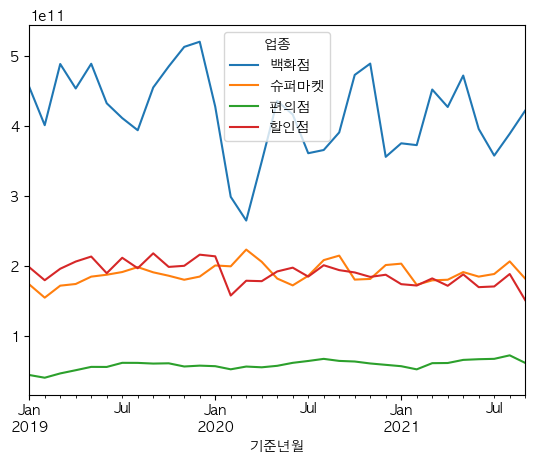

In [87]:
# 기준년월, 업종 별 총 이용금액의 합계 -> 그래프 시각화(라인그래프)
group_data2 = offline.groupby(['기준년월', '업종'])['총이용금액'].sum()
group_data2.unstack().plot()

1. 온라인.csv 파일을 로드
2. 두개의 데이터프레임을 단순한 행 결합 (유니언 결합)
    - 오프라인 데이터와 온라인 데이터의 컬럼의 이름이 다른 문제
        - 온라인 데이터의 컬럼의 이름을 변경
    - 오프라인 데이터에서 기준년월 컬럼은 지금 시계열, 온라인의 기준년월 숫자
        - 온라인의 기준년월을 시계열로 변경
    - 오프라인 데이터에서 기준년, 건당이용금액 제거 
    - 온라인 데이터에서 결측치가 존재하는가?
    - 단순 행 결합
3. 온라인 데이터에서는 업종 컬럼이 존재하지 않기 때문에 결측치 생성
    - 결측치를 '온라인' 대체

In [88]:
online = pd.read_csv('../../csv/test_csv/온라인.csv')

In [89]:
online.head()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [90]:
online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']

In [91]:
online.head()

,기준년월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [92]:
offline.head(1)

,기준년월,업종,성별,연령대,총이용건수,총이용금액,기준년,건당이용금액
0,2019-01-01,백화점,1,1,1,7600.0,2019,7600.0


In [93]:
online['기준년월'] = pd.to_datetime(online['기준년월'], format='%Y%m')

In [94]:
# 특정 컬럼을 제거
# 특정 컬럼만 선택해서 필터
offline.loc[:,'기준년월' : '총이용금액']

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03
1,2019-01-01,백화점,1,10,379,1.945872e+07
2,2019-01-01,백화점,1,20,45173,4.747711e+09
3,2019-01-01,백화점,1,30,271858,2.791826e+10
4,2019-01-01,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,2021-09-01,편의점,2,50,844081,6.283353e+09
2644,2021-09-01,편의점,2,60,243768,1.997442e+09
2645,2021-09-01,편의점,2,70,40523,3.524203e+08
2646,2021-09-01,편의점,2,80,6349,5.333488e+07


In [95]:
offline.drop(['기준년', '건당이용금액'], axis=1, inplace=True)

In [96]:
# 온라인데이터에서 결측치가 존재하는가?
online.isna().sum()

기준년월     0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [97]:
online.isin(['-']).sum()

기준년월     0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [98]:
df = pd.concat([offline, online], axis=0)

In [99]:
# df에서 업종에 존재하는 결측치는 '온라인' 대체
df['업종'].fillna('온라인')

0      백화점
1      백화점
2      백화점
3      백화점
4      백화점
      ... 
646    온라인
647    온라인
648    온라인
649    온라인
650    온라인
Name: 업종, Length: 3299, dtype: object

In [100]:
# if문 한줄 -> '참인경우결과' if 조건식 else '거짓인경우결과'
df['업종'].map(
    lambda x : '온라인' if pd.isna(x) else x
    )

0      백화점
1      백화점
2      백화점
3      백화점
4      백화점
      ... 
646    온라인
647    온라인
648    온라인
649    온라인
650    온라인
Name: 업종, Length: 3299, dtype: object

In [101]:
flag = df['업종'].isna()
df.loc[flag, '업종'] = '온라인'

In [102]:
df.isna().sum()

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [103]:
df['연령대'].value_counts()

연령대
10    330
20    330
30    330
40    330
50    330
60    330
70    330
80    330
90    330
0     284
1      45
Name: count, dtype: int64

In [104]:
df2 = df.loc[df['연령대'] != 0]

In [114]:
group_data3 = df2.groupby(['기준년월', '업종'])['총이용금액'].sum()

<Axes: xlabel='기준년월'>

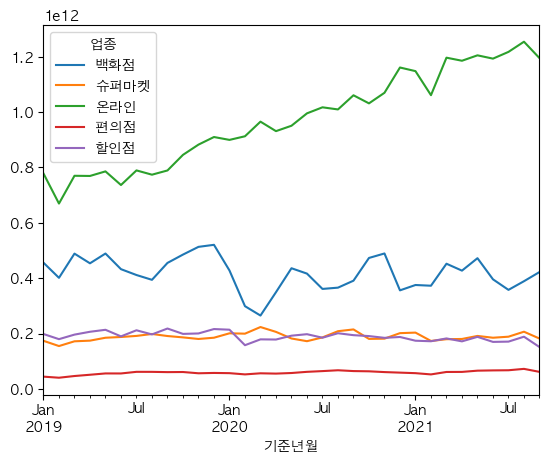

In [49]:
group_data3.unstack().plot()

In [110]:
# df2에서 '업종' 컬럼의 데이터가 온라인이라면 0
# 온라인이 아니면 1
# 새로운 컬럼을 생성
flag = df2['업종'] == '온라인'
df2.loc[flag, '온/오프'] = 0
df2.loc[~flag, '온/오프'] = 1

In [112]:
df2['온/오프'].value_counts()

온/오프
1.0    2415
0.0     600
Name: count, dtype: int64

In [119]:
df2['온/오프'] = df2['온/오프'].map(
    {
        0 : '온라인',
        1 : '오프라인'
    }
)

/var/folders/r7/wm80f9fd57g6h8jt36r8dgwh0000gn/T/ipykernel_1777/1639081860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['온/오프'] = df2['온/오프'].map(


In [120]:
df2['온/오프'].value_counts()

온/오프
오프라인    2415
온라인      600
Name: count, dtype: int64

<Axes: xlabel='기준년월'>

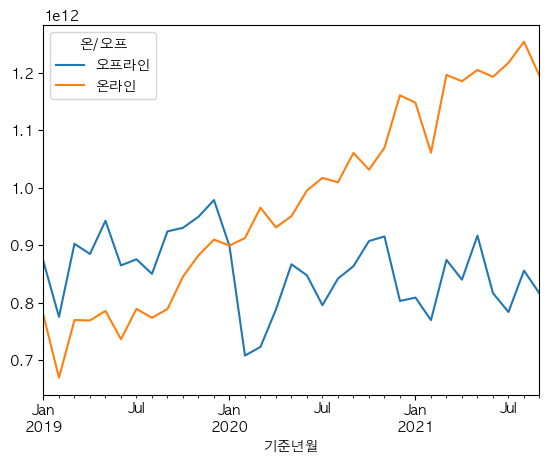

In [125]:
df2.pivot_table(
    index = '기준년월',
    columns = '온/오프',
    values = '총이용금액',
    aggfunc = 'sum'
).plot()

In [126]:
group_data3.unstack().drop('온라인', axis=1).sum()

업종
백화점     1.379302e+13
슈퍼마켓    6.221981e+12
편의점     1.931779e+12
할인점     6.251934e+12
dtype: float64